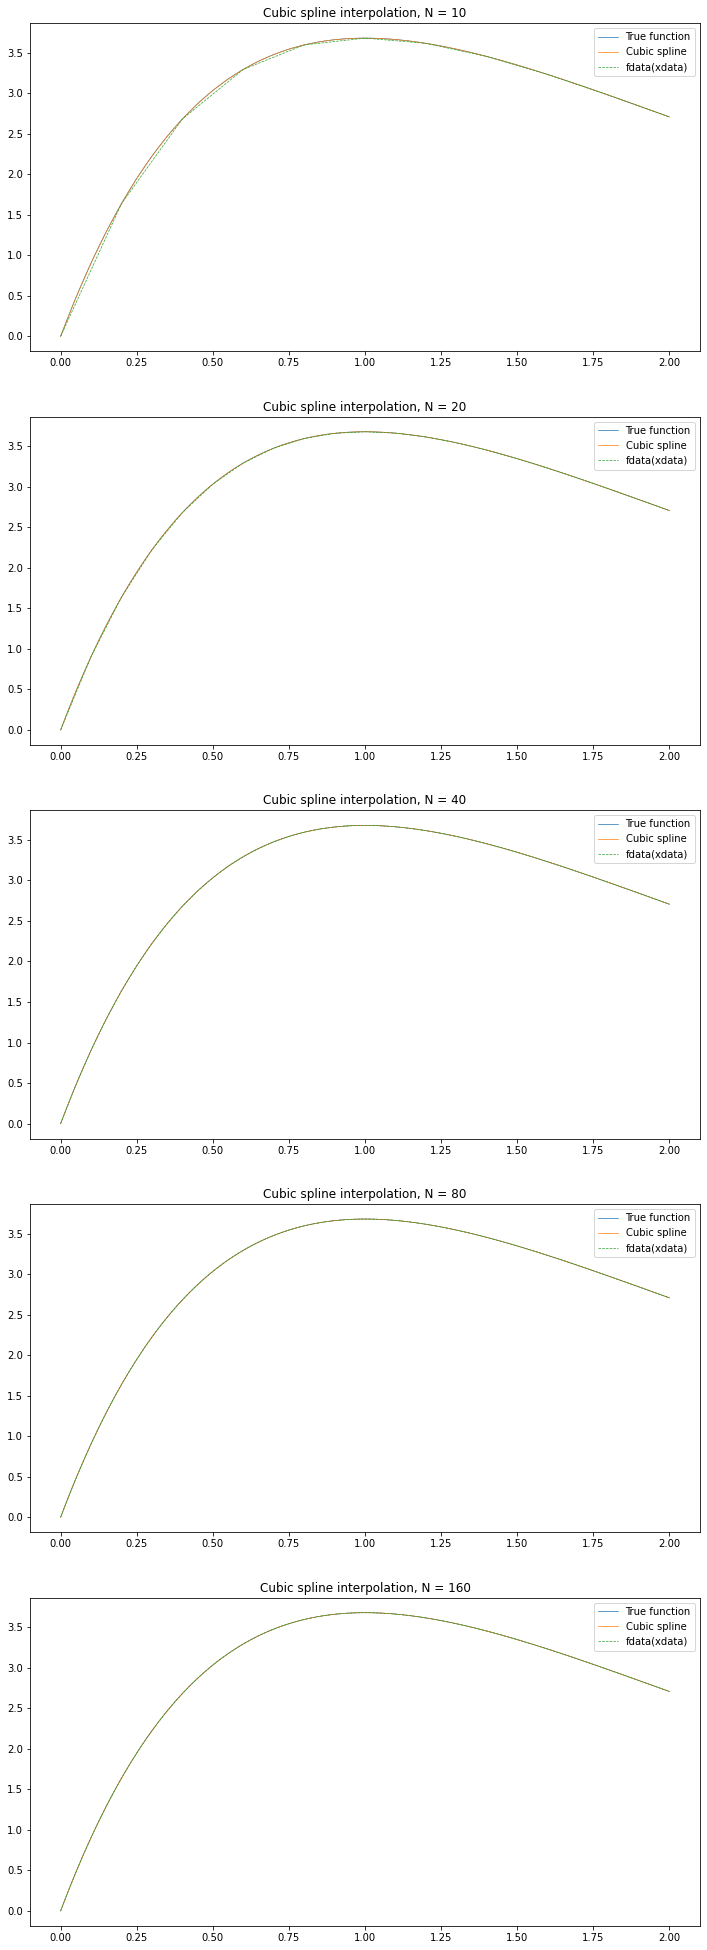

In [52]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
from pyimsl.math.cubSplineValue import cubSplineValue
from pyimsl.math.cubSplineInterpECnd import cubSplineInterpECnd

headers = ['#', 'x', 'Interpolant', 'F(x)', 'Error']
f = open('output.dat', "w", encoding="utf-8")
print('L7', file=f)
print('Danishevskii Danila, 3430302/90003', file=f)
print('Function: 10*x*e^(-x)', file=f)

def F(x):
    return 10 * x * pow(np.e, -x)

a, b = 0, 2
N = 10
max_errors = np.array([])
xVals = np.linspace(a, b, 100) #For true function graph
print('Interval: ['+ str(a) +', '+ str(b) +']', file=f)

fig, axs = plt.subplots(5, figsize=(12,35))

j = 0
while(N <= 160): # 10, 20, 40, 80, 160 numbers of partitions
    print("\n\n\nNumber of Interpolation partitions: " + str(N), file=f)

    xdata = np.empty((N + 1))
    fdata = np.empty((N + 1))
    x = np.empty((N*4 + 1))
    s = np.empty((N*4 + 1))

    h = (b - a)/N
    h_x = (b - a)/(4 * N)

    #x and f(x) values
    for i in range(N+1):
        xdata[i] = a + i*h
        fdata[i] = F(xdata[i])
    
    #Grid for spline
    for i in range(4*N + 1):
        x[i] = a + i*h_x

    pp = cubSplineInterpECnd(xdata, fdata)
    outputData = np.empty((N*4 + 1, 5))

    counter = 0
    for k in range(N*4 + 1):
        ppVal = cubSplineValue(x[k], pp)

        if ppVal == F(x[k]):
            counter += 1

        outputData[k] = np.array([k + 1, x[k], ppVal, F(x[k]), abs(F(x[k]) - ppVal)])
        s[k] = ppVal

    print("Function and Interpolant values matched in knots " + str(counter) + " times", file=f)

    max_error = np.amax(outputData, axis=0)[4]
    max_errors = np.append(max_errors, max_error)

    table = tabulate(outputData, headers, tablefmt="fancy_grid", floatfmt=('.0f', '.2f', '.7f', '.7f', '.7e'))
    print(table, file=f)

    print("Max error: " + '{:.7e}'.format(max_error), file=f)

    axs[j].plot(xVals, F(xVals), x, s, xdata, fdata, '--', linewidth=1.7)
    axs[j].set_title('Cubic spline interpolation, N = ' + str(N))
    axs[j].legend(['True function', 'Cubic spline', 'fdata(xdata)'])

    N = N*2
    j += 1


print("\n\nErrors' relations:", file=f)

N = 10
j = 0
while(N <= 160):
    error_ratio = max_errors[j]/max_errors[j+1]
    print('     Error(' + str(N) +')/Error(' + str(N*2) + ') = ' + str(error_ratio), file=f)
    j += 1
    N = N*2

    if j == 4:
        break

plt.show()
f.close()